In [34]:
#numpy - Deals multi-dimensional arrays and matrices
#seaborn - Deals with data visualization
#matplotlib - Plotting; pyplot-interactive plotting
#pandas - data structures and data analysis tools
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
titanic_df = pd.read_csv('train.csv')

In [35]:
# Convert the survived column to strings for easier reading
titanic_df ['Survived'] = titanic_df ['Survived'].map({
    0: 'Died',
    1: 'Survived'
})

In [36]:
print("======Data Headers Before Dropping Columns=======")
print(titanic_df.head(5))

======Data Headers Before Dropping Columns=======
   PassengerId  Survived  Pclass  \
0            1      Died       3   
1            2  Survived       1   
2            3  Survived       3   
3            4  Survived       1   
4            5      Died       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4    

In [37]:
print("**** \n\nDATA TRANSFORMATION *****\n")

print("======Data Headers After Dropping Columns - First Way=======")
titanic_df.drop(['Parch','PassengerId','Name','Ticket'], axis=1, inplace=True)
#axis =1 in drop method shows you are dropping a column
#inplace=True means you are editing original dataframe
print(titanic_df.head(5))
print("======Data Headers After Dropping Columns - Second Way =======")
titanic_df = titanic_df.drop(['SibSp','Fare'], axis=1)
print(titanic_df.head(5))

**** 

DATA TRANSFORMATION *****

======Data Headers After Dropping Columns - First Way=======
   Survived  Pclass     Sex   Age  SibSp     Fare Cabin Embarked
0      Died       3    male  22.0      1   7.2500   NaN        S
1  Survived       1  female  38.0      1  71.2833   C85        C
2  Survived       3  female  26.0      0   7.9250   NaN        S
3  Survived       1  female  35.0      1  53.1000  C123        S
4      Died       3    male  35.0      0   8.0500   NaN        S
======Data Headers After Dropping Columns - Second Way =======
   Survived  Pclass     Sex   Age Cabin Embarked
0      Died       3    male  22.0   NaN        S
1  Survived       1  female  38.0   C85        C
2  Survived       3  female  26.0   NaN        S
3  Survived       1  female  35.0  C123        S
4      Died       3    male  35.0   NaN        S


In [38]:
# Convert the Class column to strings for easier reading
titanic_df ['Pclass'] = titanic_df ['Pclass'].map({
    1: 'Luxury Class',
    2: 'Economy Class',
    3: 'Lower Class'
})

In [39]:
print("======Data Headers After Transforming Class Column =======")
print(titanic_df.head(5))

======Data Headers After Transforming Class Column =======
   Survived        Pclass     Sex   Age Cabin Embarked
0      Died   Lower Class    male  22.0   NaN        S
1  Survived  Luxury Class  female  38.0   C85        C
2  Survived   Lower Class  female  26.0   NaN        S
3  Survived  Luxury Class  female  35.0  C123        S
4      Died   Lower Class    male  35.0   NaN        S


In [40]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")
print("======Data Headers After Filling with default value for Embarked Column =======")
print(titanic_df.head(5))

======Data Headers After Filling with default value for Embarked Column =======
   Survived        Pclass     Sex   Age Cabin Embarked
0      Died   Lower Class    male  22.0   NaN        S
1  Survived  Luxury Class  female  38.0   C85        C
2  Survived   Lower Class  female  26.0   NaN        S
3  Survived  Luxury Class  female  35.0  C123        S
4      Died   Lower Class    male  35.0   NaN        S


In [41]:
# Convert the Embarked column to strings for easier reading
titanic_df ['Embarked'] = titanic_df ['Embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton'
})
print("======Data Headers After Transforming Embarked Column =======")
print(titanic_df.head(5))

======Data Headers After Transforming Embarked Column =======
   Survived        Pclass     Sex   Age Cabin     Embarked
0      Died   Lower Class    male  22.0   NaN  Southampton
1  Survived  Luxury Class  female  38.0   C85    Cherbourg
2  Survived   Lower Class  female  26.0   NaN  Southampton
3  Survived  Luxury Class  female  35.0  C123  Southampton
4      Died   Lower Class    male  35.0   NaN  Southampton





**** DATA VISUALIZATIONS****


Visualization #1 : Survival Rate Based on Passenger Sitting Class


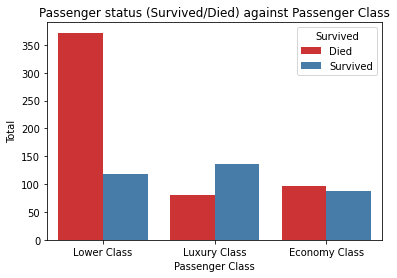

In [42]:
print("\n\n\n**** DATA VISUALIZATIONS****\n\n")
print("Visualization #1 : Survival Rate Based on Passenger Sitting Class")
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1',data = titanic_df)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()   

Visualization #2 : Survival Rate Based on Gender
Survived  Died  Survived
Sex                     
female      81       233
male       468       109


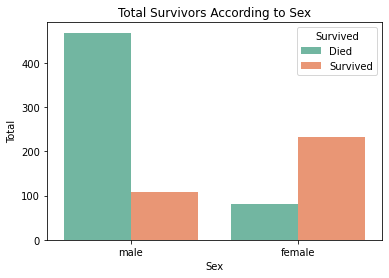

In [43]:
#crosstab - Cross tabulation of two or more factors
print("Visualization #2 : Survival Rate Based on Gender")
print(pd.crosstab(titanic_df["Sex"],titanic_df.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set2', data = titanic_df)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

Visualization #3 : Survival Rate Based on Passenger Age Group


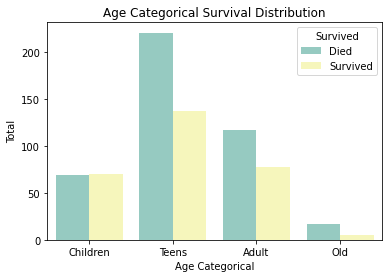

In [44]:
print("Visualization #3 : Survival Rate Based on Passenger Age Group")
# We look at Age column and set Intevals on the ages and the map them to their categories as
# (Children, Teen, Adult, Old)
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
#cut - Segment and sort data values into bins
titanic_df['Age_cats'] = pd.cut(titanic_df.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = titanic_df, hue = 'Survived', palette = 'Set3')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")
plt.show()

Visualization #4 : Survival Rate Based on Passenger Embarked Port
Survived     Died  Survived
Embarked                   
Cherbourg      75        93
Queenstown     47        30
Southampton   427       219


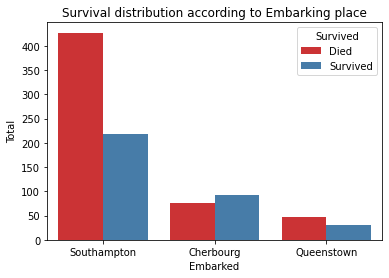

In [45]:
print("Visualization #4 : Survival Rate Based on Passenger Embarked Port")
print(pd.crosstab(titanic_df["Embarked"],titanic_df.Survived))
ax = sns.countplot(x = 'Embarked', hue = 'Survived', palette = 'Set1', data = titanic_df)
ax.set(title = 'Survival distribution according to Embarking place', xlabel = 'Embarked', ylabel='Total')
plt.show()